In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_data, train_label), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [6]:
print("Size of training dataset:{0}, size of test dataset: {1}".format(len(train_data),len(test_data)))

Size of training dataset:25000, size of test dataset: 25000


In [9]:
word_index = imdb.get_word_index()

1654784/1641221 [==============================] - 0s 0us/step


In [23]:
reverse_index = dict((value, key) for (key, value) in word_index.items())

In [60]:
print([reverse_index.get(i -3) for i in train_data[90]])

[None, 'in', 'fact', 'marc', None, 'off', 'broadway', 'adaptation', 'of', None, 'was', 'not', 'so', None, 'as', 'is', 'generally', 'believed', 'br', 'br', 'i', 'have', 'a', 'special', 'interest', 'in', None, 'my', 'dad', 'was', 'part', 'of', 'the', 'first', 'full', 'production', 'in', 'the', 'us', 'u', 'of', None, 'theatre', None, 'did', 'it', 'around', 'the', 'end', 'of', 'ww2', None, 'had', 'been', 'so', 'nearly', 'successful', 'in', None, 'the', 'play', 'that', 'they', 'had', 'to', None, 'the', 'script', 'and', 'score', 'from', None, 'in', 'two', 'different', 'languages', 'neither', 'english', 'a', 'german', None, 'script', 'and', 'similar', 'sources', None, 'adaptation', 'not', 'a', 'translation', 'which', 'had', 'the', 'full', None, 'of', None, None, 'was', 'a', 'lot', 'closer', 'to', 'the', 'original', 'than', 'generally', 'believed', 'br', 'br', 'the', 'problem', 'is', 'that', 'the', 'version', 'thereof', 'that', 'most', 'people', 'know', 'is', 'the', 'mgm', 'cast', 'recording',

In [62]:
max([max(sequence) for sequence in train_data])

9999

In [64]:
x_train = np.zeros((len(train_data), 10000))
for i, sequence in enumerate(train_data):
  x_train[i, sequence] = 1


x_test = np.zeros((len(test_data), 10000))
for j, seq in enumerate(test_data):
  x_test[j, seq] = 1

In [66]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [67]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
x_val = x_train[:10000]
remaining_x_train = x_train[10000:]

y_val = y_train[:10000]
remaining_y_train = y_train[10000:]

In [69]:
history = model.fit(remaining_x_train,
                    remaining_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.5539 - accuracy: 0.7726 - val_loss: 0.4280 - val_accuracy: 0.8639
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3435 - accuracy: 0.8994 - val_loss: 0.3373 - val_accuracy: 0.8769
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2501 - accuracy: 0.9233 - val_loss: 0.2862 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1972 - accuracy: 0.9361 - val_loss: 0.2729 - val_accuracy: 0.8911
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1605 - accuracy: 0.9502 - val_loss: 0.2794 - val_accuracy: 0.8899
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1358 - accuracy: 0.9582 - val_loss: 0.2799 - val_accuracy: 0.8879
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1108 - accuracy: 0.9676 - val_loss: 0.2997 - val_accuracy: 0.8832
Epoch 8/20
30

In [70]:
type(history)

keras.callbacks.History

In [71]:
result_dictionary = history.history
result_dictionary.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

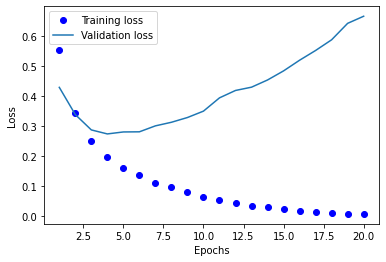

In [74]:
loss = result_dictionary['loss']
val_loss = result_dictionary['val_loss']

epok = range(1, len(result_dictionary.get('accuracy'))+1)

plt.plot(epok, loss, 'bo', label='Training loss')
plt.plot(epok, val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

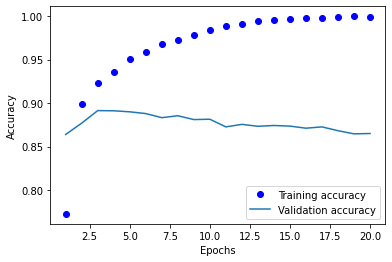

In [76]:
loss = result_dictionary['accuracy']
val_loss = result_dictionary['val_accuracy']

epok = range(1, len(result_dictionary.get('accuracy'))+1)

plt.plot(epok, loss, 'bo', label='Training accuracy')
plt.plot(epok, val_loss, label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()